In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Creating the class

In [37]:
class Bandit:
    def __init__(self,m):
        self.m = m #It is true mean
        self.mean = 0 #It is our estimate of bandits mean
        self.N = 0 #
     
    # This function simulates pull the bandits on
    def pull(self):
        return np.random.rand() + self.m 
    
    def update(self,x): #X is latest sample received from the bandit
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + 1.0/self.N*x
        
    
        
        

## Running the Experiments

In [38]:
def run_experiment(m1,m2,m3,eps,N): #it takes three  different mean
    bandits = [Bandit(m1),Bandit(m2),Bandit(m3)] #Since we are going to  compare three different bandits
    
    data = np.empty(N)
    
    for i in range(N):
        #epsilon greedy
        p = np.random.random()
        if p<eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull() #we pull the choosen bandit
        bandits[j].update # we update the bandit with reward we just got
        
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N)+1) 
    
    #plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average
    
        
    

## Visualising

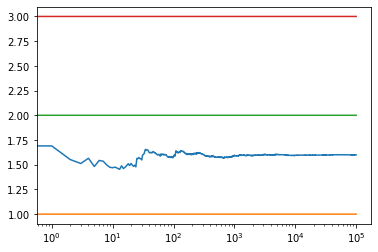

0
0
0


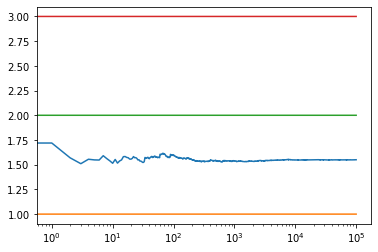

0
0
0


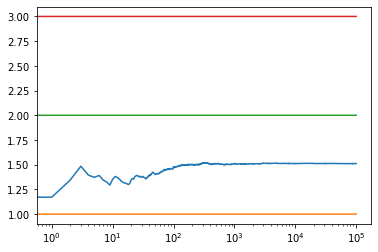

0
0
0


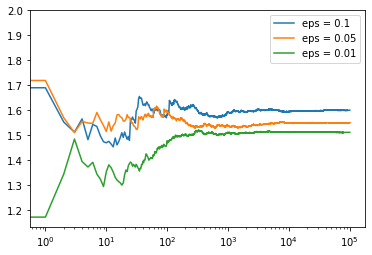

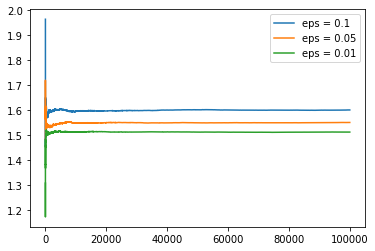

In [39]:
if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()